
Graficador de Fractales
Escoja una opcion:

1. Curva de Koch
2. Curva del Dragón
3. Curva de Hilbert
4. Triangulo de Sierpinski I
5. Triangulo de Sierpinski II
6. Copo de Nieve de Koch
7. Rama de árbol
8. Rombo Fractal
9. Salir
Digite su opcion: 5
Numero de iteraciones: (1-10) 7


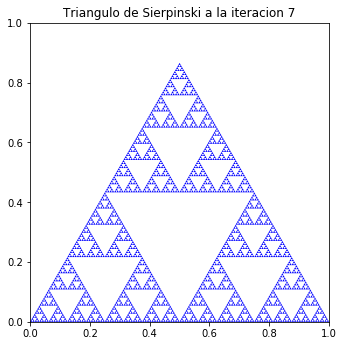


Graficador de Fractales
Escoja una opcion:

1. Curva de Koch
2. Curva del Dragón
3. Curva de Hilbert
4. Triangulo de Sierpinski I
5. Triangulo de Sierpinski II
6. Copo de Nieve de Koch
7. Rama de árbol
8. Rombo Fractal
9. Salir
Digite su opcion: 4
Numero de iteraciones: (1-13) 7


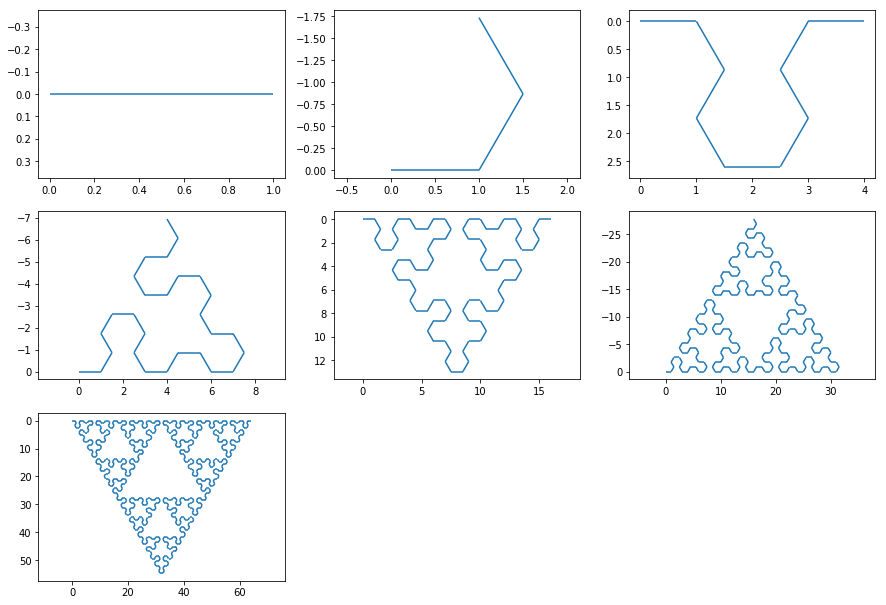

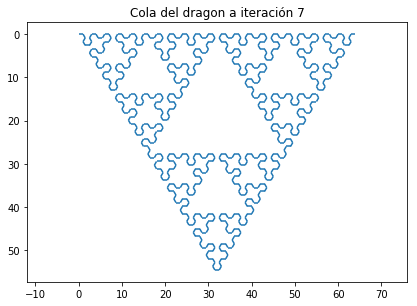


Graficador de Fractales
Escoja una opcion:

1. Curva de Koch
2. Curva del Dragón
3. Curva de Hilbert
4. Triangulo de Sierpinski I
5. Triangulo de Sierpinski II
6. Copo de Nieve de Koch
7. Rama de árbol
8. Rombo Fractal
9. Salir


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import collections

class Fractal(object):
    def __init__(self, regla):
        info = regla['S']
        for i in range(regla['iter']):
            ninfo = []
            for c in info:
                if c in regla:
                    ninfo.append(regla[c])
                else:
                    ninfo.append(c)
            info = "".join(ninfo)

        self.regla = regla
        self.info = info

    def get_lineas(self):
        direcc = self.regla['direccion']
        ang_giro = self.regla['angulo']
        pos_inicial = (0.0, 0.0)
        long_linea = 1.0
        lineas = []
        pila = []
        for c in self.info:
            if c in "Ff":
                a_rad = direcc * np.pi / 180
                pos_destino = pos_inicial[0] + long_linea*np.cos(a_rad), pos_inicial[1] + long_linea*np.sin(a_rad)
                lineas.append(((pos_inicial[0], pos_inicial[1]), (pos_destino[0], pos_destino[1])))
                pos_inicial = pos_destino
            elif c == "+":
                direcc += ang_giro
            elif c == "-":
                direcc -= ang_giro
            elif c == "[":
                pila.append((pos_inicial,direcc))
            elif c == "]":
                pos_inicial, direcc = pila[-1]
                del pila[-1]
        return lineas

reglas = [
    {
        "F":"F+F--F+F", "S":"F",
        "direccion":180,
        "angulo":60,
        "iter":1,
        "fractal":"Koch"
    },
    {
        "X":"X+YF+", "Y":"-FX-Y", "S":"FX",
        "direccion":0,
        "angulo":90,
        "iter":1,
        "fractal":"Dragon"
    },
    {
        "f":"F-f-F", "F":"f+F+f", "S":"f",
        "direccion":0,
        "angulo":60,
        "iter":1,
        "fractal":"Triangle"
    },
    {
        "X":"F-[[X]+X]+F[+FX]-X", "F":"FF", "S":"X",
        "direccion":-45,
        "angulo":25,
        "iter":1,
        "fractal":"Plant"
    },
    {
        "S":"X", "X":"-YF+XFX+FY-", "Y":"+XF-YFY-FX+",
        "direccion":0,
        "angulo":90,
        "iter":1,
        "fractal":"Hilbert"
    },
    {
        "S":"L--F--L--F", "L":"+R-F-R+", "R":"-L+F+L-",
        "direccion":0,
        "angulo":45,
        "iter":1,
        "fractal":"Sierpinski"
    },
]

def dibujarFractal(regla, iteraciones=None):
    fig = plt.figure(figsize=(15,10.5))
    for i in range(iteraciones):
        if iteraciones!=None:
            regla["iter"] = i
        lineas = Fractal(regla).get_lineas()
        linecollections = collections.LineCollection(lineas)
        ax = fig.add_subplot(331+i)
        ax.add_collection(linecollections, autolim=True)
        ax.axis("equal") 
        ax.invert_yaxis()
   # plt.title('Cola del dragon')
    plt.show()
    
def dibujarFractal2(regla, iteraciones=None):
    if iteraciones!=None:
        regla["iter"] = iteraciones
    lineas = Fractal(regla).get_lineas()
    fig = plt.figure(figsize=(15,10.5))
    ax = fig.add_subplot(221)
    linecollections = collections.LineCollection(lineas)
    ax.add_collection(linecollections, autolim=True)
    ax.axis("equal") 
    ax.invert_yaxis()
    plt.title(f'Cola del dragon a iteración {iteraciones +1}')
    plt.show()

def generarFractal(numCurva):
    salirKoch = False
    while not salirKoch:
        iter = int(input('Numero de iteraciones: (1-13) '))
        if 0 < iter < 10:
            dibujarFractal(reglas[numCurva],iter)
            dibujarFractal2(reglas[numCurva],iter-1)
            salirKoch = True
        else:
            dibujarFractal(reglas[numCurva],9)
            dibujarFractal2(reglas[numCurva],iter-1)
            salirKoch = True

## Sierpinski
def trazar_triangulo(Posicion):
    m = Posicion * 0.5
    n = Posicion * 0.5 + np.array([0.5, 0])
    k = Posicion * 0.5 + np.array([0.25, np.sqrt(3)/4])
    return np.array([m,n,k])

def generarSierpinski(iteracion):
    # triangulo unitario inicial
    triangle = np.array([[0, 0],
                  [1, 0],
                  [0.5, np.sqrt(3)/2]])
    # Crea un array que representa el triangulo Sierpinski hasta la iteracion deseada
    for e in range(iteracion):
        triangle = trazar_triangulo(triangle)
    # Se procede a graficar el triangulo
    fig1 = plt.figure(figsize=(10,5.5))
    ax1 = fig1.add_subplot(111, aspect='equal')
    for t in triangle.reshape(3**iteracion,3,2):
        ax1.add_patch(mpatches.Polygon(t, fc="b"))
    plt.title(f'Triangulo de Sierpinski a la iteracion {iteracion}')
    plt.show()
    
########## ============= App =========== ##########
salirMenuPrincipal = False
while not salirMenuPrincipal:
    print ("\nGraficador de Fractales\nEscoja una opcion:\n")
    print ("1. Curva de Koch")
    print ("2. Curva del Dragón")
    print ("3. Curva de Hilbert")
    print ("4. Triangulo de Sierpinski I")
    print ("5. Triangulo de Sierpinski II")
    print ("6. Copo de Nieve de Koch")
    print ("7. Rama de árbol")
    print ("8. Rombo Fractal")
    print ("9. Salir")
    opcion = int(input('Digite su opcion: '))
    if opcion == 1: # Koch
        generarFractal(0)
    elif opcion == 2:
        generarFractal(1)
    elif opcion == 3:
        generarFractal(4)
    elif opcion == 4:
        generarFractal(2)
    elif opcion == 5:
        iter = int(input('Numero de iteraciones: (1-10) '))
        generarSierpinski(iter)
    elif opcion == 6:
        iter = int(input('Numero de iteraciones: (1-10) '))
        generarCopo(iter)
    elif opcion == 7:
        generarFractal(3)
    elif opcion == 8:
        generarFractal(5)
    elif opcion == 9:
        salirMenuPrincipal = True
        print('Fin')
  

In [ ]:
### Copo de Nieve de Koch
import numpy as np
import matplotlib.pyplot as plt
def getp(p1,p2):
    z=complex(p2[0]-p1[0],p2[1]-p1[1])
    zr=complex(1/2,-3**(1/2)/2)
    z=z*zr
    p=[z.real+p1[0],z.imag+p1[1]]
    return p

def obtener_posiciones(iteracion):
    ir=10
    pos_ini1=[0,0]
    pos_ini2=[ir,0]
    pos_ini3=[ir/2,ir/2*(3**(1/2))]
    if iteracion==0:
        return [pos_ini1,pos_ini2,pos_ini3]
    else:
        points=obtener_posiciones(iteracion-1)
        points.append(pos_ini1)
        i=0 
        ls=[]
        while(1):
            p1=points[i]
            p2=points[i+1]
            p11=[p1[0]+(p2[0]-p1[0])/3,p1[1]+(p2[1]-p1[1])/3]
            p12=[p1[0]+(p2[0]-p1[0])/3*2,p1[1]+(p2[1]-p1[1])/3*2]
            p=getp(p11,p12)
            ls.append(p1)
            ls.append(p11)
            ls.append(p)
            ls.append(p12)
            i=i+1
            if len(points)-1<i+1:
                break
        return ls

def generarCopo(iteracion):
    ps = obtener_posiciones(iteracion)
    lineas_izq = []
    lineas_alt = []
    for p in ps: 
        lineas_izq.append(p[0])
        lineas_alt.append(p[1])
        
    lineas_izq.append(ps[0][0])
    lineas_alt.append(ps[0][1])
    left = np.array(lineas_izq)
    height = np.array(lineas_alt)
    
    plt.plot(left, height)
    plt.show()
    
iter = int(input('Numero de iteraciones: (0-10) '))
generarCopo(iter)